# Loteca

In [1]:
import keras
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### Ler arquivo

In [2]:
# df = np.load('arquivo.npy')

In [3]:
# Define o ganhador H = casa, A = Vizitante, D = empate
# for i in range(len(df)):
#     df[i,8] = 'H' if (int(df[i,2]) - int(df[i,6])) > 0 else 'A' if (int(df[i,2]) - int(df[i,6])) < 0 else 'D'

In [4]:
# Cria um data frame para receber os valores
# df_ = pd.DataFrame(df,columns=['Concurso','Jogo','HG','Home','S','Away','AG','Dia','Res'])

In [5]:
# Transforma as colunas de gols em inteiros
# df_ = df_.astype({"HG": int, "AG": int})

In [6]:
# df_.head()

,Concurso,Jogo,HG,Home,S,Away,AG,Dia,Res
0,Concurso 1 (18/02/2002),1,2,FLAMENGO/RJ,,S. PAULO/SP,4,Domingo,A
1,Concurso 1 (18/02/2002),2,3,VASCO/RJ,,AMERICANO/RJ,0,Domingo,H
2,Concurso 1 (18/02/2002),3,2,SANTOS/SP,,SÃO CAETANO/SP,1,Domingo,H
3,Concurso 1 (18/02/2002),4,1,P. DESPORTOS/SP,,CORINTHIANS/SP,4,Domingo,A
4,Concurso 1 (18/02/2002),5,7,CRUZEIRO/MG,,AMÉRICA/MG,0,Sábado,H


### Frequencia de vitórias em casa (H), empates (D) e visitantes (A)

<BarContainer object of 3 artists>

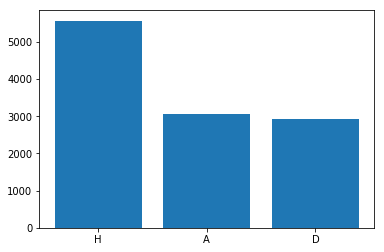

In [7]:
# plt.bar(df_['Res'].value_counts().keys(),df_['Res'].value_counts())

### Média de gols dos últimos jogos

In [8]:
# Calcula a soma de gols feitos das ultimas n (window) partidas
# def get_rolling_goals(dataFrame, equip, pos, window, HG_AG):   
#     HA = 'Home' if HG_AG == 'HG' else 'Away' if HG_AG == 'AG' else ''
#     s = dataFrame[:pos][dataFrame[HA] == equip][HG_AG][-window:].sum()
#     return s if not(np.isnan(s)) else 0

# Calcula a soma de gols recebidos das ultimas n (window) partidas
# def get_rolling_received(dataFrame, equip, pos, window, HG_AG):   
#     HA = 'Home' if HG_AG == 'HG' else 'Away' if HG_AG == 'AG' else ''
#     HG_AG_ = 'HG' if HG_AG == 'AG' else 'AG' if HG_AG == 'HG' else ''
#     s = dataFrame[:pos][dataFrame[HA] == equip][HG_AG_][-window:].sum()
#     return s if not(np.isnan(s)) else 0

    

In [9]:
# dfg = []
# for idx, row in df_.iterrows():
#     row['H_Goals_Scored'] = get_rolling_goals(df_, row['Home'], idx, 20, 'HG')
#     row['A_Goals_Scored'] = get_rolling_goals(df_, row['Away'], idx, 20, 'AG')
#     row['H_Goals_Against'] = get_rolling_received(df_, row['Home'], idx, 20, 'HG')
#     row['A_Goals_Against'] = get_rolling_received(df_, row['Away'], idx, 20, 'AG')
#     dfg.append(row)
    
    
    
    

C:\Users\flamo\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\flamo\AppData\Local\conda\conda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [10]:
# dfgs = pd.DataFrame(dfg)

In [11]:
# dfgs[dfgs['Concurso']=='Concurso 800 (21/05/2018)']

,Concurso,Jogo,HG,Home,S,Away,AG,Dia,Res,H_Goals_Scored,A_Goals_Scored,H_Goals_Against,A_Goals_Against
11182,Concurso 800 (21/05/2018),1,1,SÃO PAULO/SP,,SANTOS/SP,0,Domingo,H,34,19,18,23
11183,Concurso 800 (21/05/2018),2,1,ATLÉTICO/MG,,CRUZEIRO/MG,0,Sábado,H,36,19,22,23
11184,Concurso 800 (21/05/2018),3,1,FLAMENGO/RJ,,VASCO DA GAMA/RJ,1,Sábado,D,33,20,10,25
11185,Concurso 800 (21/05/2018),4,1,LONDRINA/PR,,CSA/AL,2,Sábado,A,21,14,17,16
11186,Concurso 800 (21/05/2018),5,1,PONTE PRETA/SP,,ATLÉTICO/GO,3,Sábado,A,21,21,21,20
11187,Concurso 800 (21/05/2018),6,1,BOA ESPORTE/MG,,CORITIBA/PR,1,Sábado,D,20,24,9,25
11188,Concurso 800 (21/05/2018),7,0,PARANÁ/PR,,GRÊMIO/RS,0,Domingo,D,25,19,20,26
11189,Concurso 800 (21/05/2018),8,1,SPORT/PE,,CORINTHIANS/SP,1,Domingo,D,29,25,23,16
11190,Concurso 800 (21/05/2018),9,3,PALMEIRAS/SP,,BAHIA/BA,0,Sábado,H,33,18,11,20
11191,Concurso 800 (21/05/2018),10,2,VITÓRIA/BA,,CEARÁ/CE,1,Domingo,H,21,19,18,26


In [12]:
# dfgs.to_csv('arquivo_loteca1.csv')

In [3]:
df_ = pd.read_csv('arquivo_loteca1.csv')

In [10]:
df_.head()

,Unnamed: 0,Concurso,Jogo,HG,Home,S,Away,AG,Dia,Res,H_Goals_Scored,A_Goals_Scored,H_Goals_Against,A_Goals_Against
0,0,Concurso 1 (18/02/2002),1,2,FLAMENGO/RJ,,S. PAULO/SP,4,Domingo,A,0,0,0,0
1,1,Concurso 1 (18/02/2002),2,3,VASCO/RJ,,AMERICANO/RJ,0,Domingo,H,0,0,0,0
2,2,Concurso 1 (18/02/2002),3,2,SANTOS/SP,,SÃO CAETANO/SP,1,Domingo,H,0,0,0,0
3,3,Concurso 1 (18/02/2002),4,1,P. DESPORTOS/SP,,CORINTHIANS/SP,4,Domingo,A,0,0,0,0
4,4,Concurso 1 (18/02/2002),5,7,CRUZEIRO/MG,,AMÉRICA/MG,0,Sábado,H,0,0,0,0


### Nomes dos times

In [4]:
# Cria uma lista de nomes dos times
vocab = np.unique(np.concatenate((np.array(df_['Home'].unique()), np.array(df_['Away'].unique()))))

In [5]:
# Cria o indice de times
word2idx = {word: i for i, word in enumerate(vocab)}

In [32]:
# Retorna o indice de um time:
def word2vector(word):
    m = np.zeros(len(word2idx))
    idx = word2idx.get(word)
    if idx == '':
        raise ValueError('Time não encontrado no indice: ' + word)

    m[word2idx.get(word)] = 1
    return m

In [33]:
# Transforma os dois times em um vetor com o flag do time correspondente e a média de gols
def prepare(H,A):
    
    vector = []
    
    for x in word2vector(H):
        if math.isnan(x):
            raise ValueError('Time não encontrado no indice: ' + H)

        vector.append(x)
        
    for x in word2vector(A):
        if math.isnan(x):
            raise ValueError('Time não encontrado no indice: ' + A)
            
        vector.append(x)
                

#     Cálculo das médias de gols
#     vector.append(get_rolling_goals(df_, H, pos, 10, 'HG'))
#     vector.append(get_rolling_goals(df_, A, pos, 10, 'AG'))
    
#     vector.append(get_rolling_received(df_, H, pos, 10, 'HG'))
#     vector.append(get_rolling_received(df_, A, pos, 10, 'AG'))

    

    return vector

### Indexar os resultados

In [145]:
X = []
y = []

for ind_, row in df_.iterrows():
    
    vec = [word2vector(row['Home']), word2vector(row['Away'])]
    
    vec = np.array(vec).reshape(np.array(vec).shape[1]*2)
    
    vec = np.append(vec, row['H_Goals_Scored'])
    vec = np.append(vec, row['A_Goals_Scored'])
    
    
    X.append(vec)        
    
    ry = [1,0,0] if int(row['HG']) > int(row['AG']) else \
    [0,1,0] if int(row['HG']) == int(row['AG']) else \
    [0,0,1] if int(row['HG']) < int(row['AG']) else [0,0,0]

    y.append(ry)

y = np.array(y).reshape(np.array(y).shape[0],3)

X = np.array(X)

# Normalizar gols
# X[:,-4:-3] = X[:,-4:-3]/X[:,-4:-3].max()
# X[:,-3:-2] = X[:,-3:-2]/X[:,-3:-2].max()
X[:,-2:-1] = X[:,-2:-1]/X[:,-2:-1].max()
X[:,-1:] = X[:,-1:]/X[:,-1:].max()



### Modelo

In [146]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

model = Sequential()
model.add(Dense(124, input_shape=(np.array(X).shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(62, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(62, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Flatten())
model.add(Dense(3))
model.add(Activation('sigmoid'))

In [147]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


### Separar os datasets de treinamento e teste

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [148]:
split = 40

In [149]:
X_train, y_train, X_test, y_test = X[:-int(X.shape[0]/split)], y[:-int(y.shape[0]/split)], X[-int(X.shape[0]/split):], y[-int(y.shape[0]/split):],

In [ ]:
# Cria uma matriz de pesos da massa de treino
# weights = []
# weights = np.zeros(y_train.shape[0])

In [ ]:
# for weight in range(weights.shape[0]):
#     if weight > 500:
#         weights[weight] = (weight**(weight/weights.shape[0]))/weight

In [ ]:
# plt.plot(weights)

### Treinar o modelo

In [150]:
history = model.fit(X_train, y_train, epochs=500, batch_size=500, shuffle=True)

Epoch 1/500
11271/11271 [==============================] - 1s 88us/step - loss: 0.6641 - acc: 0.6647
Epoch 2/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.6385 - acc: 0.6667
Epoch 3/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.6197 - acc: 0.6664
Epoch 4/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.6114 - acc: 0.6656
Epoch 5/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.6037 - acc: 0.6787
Epoch 6/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.5907 - acc: 0.6996
Epoch 7/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.5755 - acc: 0.7085
Epoch 8/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.5603 - acc: 0.7190
Epoch 9/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.5466 - acc: 0.7285
Epoch 10/500
11271/11271 [==============================] - 0s 24us/step - loss: 0.5325 - a

11271/11271 [==============================] - 0s 25us/step - loss: 0.3547 - acc: 0.8242
Epoch 82/500
11271/11271 [==============================] - 0s 24us/step - loss: 0.3571 - acc: 0.8222
Epoch 83/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.3564 - acc: 0.8203
Epoch 84/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3545 - acc: 0.8247
Epoch 85/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3519 - acc: 0.8254
Epoch 86/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3514 - acc: 0.8242
Epoch 87/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3535 - acc: 0.8241
Epoch 88/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3522 - acc: 0.8240
Epoch 89/500
11271/11271 [==============================] - 0s 24us/step - loss: 0.3542 - acc: 0.8230
Epoch 90/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.3449 - acc: 

11271/11271 [==============================] - 0s 26us/step - loss: 0.3162 - acc: 0.8440
Epoch 161/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3130 - acc: 0.8465
Epoch 162/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3092 - acc: 0.8467
Epoch 163/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3170 - acc: 0.8423
Epoch 164/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.3129 - acc: 0.8448
Epoch 165/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3110 - acc: 0.8460
Epoch 166/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3070 - acc: 0.8479
Epoch 167/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3140 - acc: 0.8452
Epoch 168/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.3105 - acc: 0.8468
Epoch 169/500
11271/11271 [==============================] - 0s 24us/step - loss: 0.309

11271/11271 [==============================] - 0s 25us/step - loss: 0.2840 - acc: 0.8620
Epoch 240/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2837 - acc: 0.8607
Epoch 241/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2833 - acc: 0.8638
Epoch 242/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.2871 - acc: 0.8600
Epoch 243/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2849 - acc: 0.8607
Epoch 244/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2853 - acc: 0.8588
Epoch 245/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.2843 - acc: 0.8595
Epoch 246/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.2837 - acc: 0.8619
Epoch 247/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2856 - acc: 0.8592
Epoch 248/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.285

11271/11271 [==============================] - 0s 25us/step - loss: 0.2628 - acc: 0.8741
Epoch 319/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2667 - acc: 0.8715
Epoch 320/500
11271/11271 [==============================] - 0s 27us/step - loss: 0.2673 - acc: 0.8717
Epoch 321/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2673 - acc: 0.8706
Epoch 322/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2653 - acc: 0.8725
Epoch 323/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2629 - acc: 0.8728
Epoch 324/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2655 - acc: 0.8725
Epoch 325/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.2671 - acc: 0.8718
Epoch 326/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2715 - acc: 0.8685
Epoch 327/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.261

11271/11271 [==============================] - 0s 26us/step - loss: 0.2573 - acc: 0.8757
Epoch 398/500
11271/11271 [==============================] - 0s 24us/step - loss: 0.2549 - acc: 0.8768
Epoch 399/500
11271/11271 [==============================] - 0s 27us/step - loss: 0.2486 - acc: 0.8805
Epoch 400/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.2519 - acc: 0.8809
Epoch 401/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2461 - acc: 0.8827
Epoch 402/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2492 - acc: 0.8813
Epoch 403/500
11271/11271 [==============================] - 0s 24us/step - loss: 0.2483 - acc: 0.8814
Epoch 404/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.2499 - acc: 0.8818
Epoch 405/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2508 - acc: 0.8798
Epoch 406/500
11271/11271 [==============================] - 0s 27us/step - loss: 0.249

11271/11271 [==============================] - 0s 25us/step - loss: 0.2405 - acc: 0.8869
Epoch 477/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2412 - acc: 0.8847
Epoch 478/500
11271/11271 [==============================] - 0s 24us/step - loss: 0.2436 - acc: 0.8852
Epoch 479/500
11271/11271 [==============================] - 0s 25us/step - loss: 0.2404 - acc: 0.8846
Epoch 480/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.2421 - acc: 0.8876
Epoch 481/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.2417 - acc: 0.8864
Epoch 482/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.2402 - acc: 0.8880
Epoch 483/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.2403 - acc: 0.8879
Epoch 484/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.2397 - acc: 0.8871
Epoch 485/500
11271/11271 [==============================] - 0s 26us/step - loss: 0.242

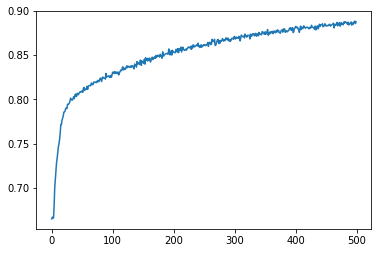

In [151]:
plt.plot(history.history['acc'])

In [152]:
model.evaluate(X_test, 
               y_test, verbose=1)

289/289 [==============================] - 0s 789us/step


[2.120104662687308, 0.6378316230633679]

### Avaliar precisão

In [124]:
# Cria as colunas com os resultados reais e as apostas
def aposta(dr,p):
    dr['RC1'] = 'X' if dr['HG'] > dr['AG'] else ''
    dr['RCM'] = 'X' if dr['HG'] == dr['AG'] else ''
    dr['RC2'] = 'X' if dr['HG'] < dr['AG'] else ''
    
    
#     Criar apostas com jogos simples, duplos e triplos:
    c=0
    if p[0,0] > p.mean():
        dr['AC1'] = 'X' 
        c += 1
    else:
        dr['AC1'] = ''
    

    if p[0,1] > p.mean():
        dr['ACM'] = 'X' 
        c += 1
    else:
        dr['ACM'] = ''

    if p[0,2] > p.mean():
        dr['AC2'] = 'X' 
        c += 1
    else:
        dr['AC2'] = ''
        
#         Criar marcador de jogos duplos e triplos
    if c==2:
        dr['D']='D'
    else:
        dr['D']=''
    if c==3:
        dr['T']='T'
    else:
        dr['T']=''
        

    return dr
    
    
    

In [159]:
dfx = df_[int(-df_.shape[0]/split):]

ds = []

X_ = X[-int(X.shape[0]/split):]

prec = []

i = 0

y_true = []

y_prec = []

for row in X_test:    

    p = model.predict([[row]])
    
    m = p[0].max()
    
    r = [1,0,0] if p[0,0] == m else [0,1,0] if p[0,1] == m else [0,0,1] if p[0,2] == m else [0,0,0]       
    
    a = 1 if (r == y_test[i]).all() else 0
    
    prec.append(r)   
    
    
    i += 1
    
#     Cria um dataframe com os resultados para report
    ds.append(a)    
    
print(round(((np.mean(ds))) * 100,2), '%')
    

45.33 %


In [160]:
from pandas_ml import ConfusionMatrix

In [164]:
confusion_matrix = ConfusionMatrix(y_true, y_pred)

(289, 3)

In [161]:
confusion_matrix = ConfusionMatrix(y_test, prec)

Exception: Data must be 1-dimensional

In [ ]:
dfs[dfs['Concurso']=='Concurso 825 (05/11/2018)']

In [ ]:
dfs[dfs['S']==dfs['Res']].groupby(['Concurso'])['Concurso'].value_counts()

In [ ]:
# Considera os duplos e triplos
# RC1	RCM	RC2	AC1	ACM	AC2
dfs[((dfs['RC1']==dfs['AC1'])&(dfs['RC1']=='X')) | ((dfs['RC2']==dfs['AC2'])&(dfs['RC2']=='X')) | ((dfs['RCM']==dfs['ACM'])&(dfs['RCM']=='X'))].groupby(['Concurso'])['Concurso'].value_counts()

In [ ]:
# Preço das apostas
2**dfs[dfs['D']=='D'].groupby(['Concurso'])['Concurso'].value_counts()

### Lista de times

In [ ]:
vocab

### Realizar previsão

In [ ]:
H = 'LIVERPOOL/ING'
A = 'TOTTENHAM/ING'

prep = [prepare(H,A,1)]
    
prepx = np.array(prep).reshape(np.array(prep).shape[0],np.array(prep).shape[1])
    
p = model.predict(prepx)


print(p)


In [ ]:
p[0,2]

In [ ]:
p.mean()